## To predict how many passengers are survived in Titanic

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("Titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Basic checks
### Exploratory Data analysis
### Data preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
## Getting the rows where values are missed in Age  feature
data.loc[data['Age'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [6]:
# Replacing Null values in Age with the mean of that column
data['Age']=data['Age'].replace(np.NaN, data['Age'].mean())

In [7]:
data.loc[data['Age'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
data.loc[data["Embarked"]==0]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
data['Embarked']= data["Embarked"].replace(np.NaN, "S")


In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
# As Cabin is a catagorical variable we will see later


In [13]:
# Checking for any 0 values in columns
data.loc[data['Embarked']==0]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [14]:
# Replacing the 0 values in Embarked  with the mean of its column
#data['Embarked']= data['Embarked'].replace(0, data['Embarked'].mean())

In [15]:
data.loc[data['Pclass']==0]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [16]:
data.loc[data['Gender']==0]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [17]:
data.loc[data['Age']==0]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [18]:
# There can be 0 value in SibSp column as it is number os siblings 

In [19]:
# There can be 0 value in Parch column as it is number of parents/children aboard

In [20]:
data.loc[data['Ticket']==0]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [21]:
data.loc[data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,NaN,S


In [22]:
#Fare cannot be 0 so replacing 0 with the mean of that column
data['Fare']= data['Fare'].replace(0,data['Fare'].mean())

In [23]:
data.loc[data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [24]:
data

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [25]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.Gender=lc.fit_transform(data.Gender)
data.Embarked=lc.fit_transform(data.Embarked)


In [26]:
data

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0


In [27]:
data.drop(['Name'], axis=1, inplace=True)

In [28]:
data.drop(['Ticket'], axis=1, inplace=True)

In [29]:
data.drop(['PassengerId'], axis=1, inplace=True)

In [30]:
data.drop(['Cabin'], axis=1, inplace=True)

In [31]:
data.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [32]:
data.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Now our data has no Null values and no o values

In [33]:
data

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [34]:
data.describe()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.746366,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.514272,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,4.012500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,15.100000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,32.204208,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [37]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
data[['Pclass','Gender','Age','SibSp','Parch','Fare','Embarked']]=scale.fit_transform(data[['Pclass','Gender','Age','SibSp','Parch','Fare','Embarked']])


In [38]:
data.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,1.0,1.0,0.271174,0.125,0.0,0.006369,1.0
1,1,0.0,0.0,0.472229,0.125,0.0,0.132340,0.0
2,1,1.0,0.0,0.321438,0.000,0.0,0.007697,1.0
3,1,0.0,0.0,0.434531,0.125,0.0,0.096569,1.0
4,0,1.0,1.0,0.434531,0.000,0.0,0.007943,1.0


## Feature Selection

In [39]:
corr_data= data[['Pclass','Gender','Age','SibSp','Parch','Fare','Embarked']]

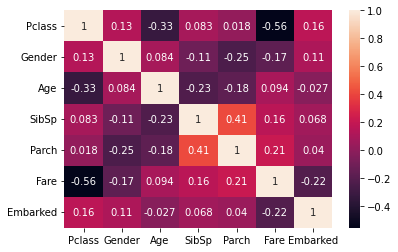

In [40]:
sns.heatmap(corr_data.corr(), annot=True);

In [41]:

## There is no relationship among the columns 


In [42]:
data.describe()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.647587,0.367921,0.065376,0.063599,0.056527,0.768238
std,0.486592,0.418036,0.477990,0.163383,0.137843,0.134343,0.097408,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.271174,0.000000,0.000000,0.007697,0.500000
50%,0.000000,1.000000,1.000000,0.367921,0.000000,0.000000,0.021812,1.000000
75%,1.000000,1.000000,1.000000,0.434531,0.125000,0.000000,0.055461,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
data.duplicated().sum()

111

In [44]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Model Creation

In [45]:
X= data.drop(columns=['Survived'])
Y= data.Survived

In [46]:
X

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.271174,0.125,0.000000,0.006369,1.0
1,0.0,0.0,0.472229,0.125,0.000000,0.132340,0.0
2,1.0,0.0,0.321438,0.000,0.000000,0.007697,1.0
3,0.0,0.0,0.434531,0.125,0.000000,0.096569,1.0
4,1.0,1.0,0.434531,0.000,0.000000,0.007943,1.0
...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.017681,1.0
887,0.0,0.0,0.233476,0.000,0.000000,0.051125,1.0
888,1.0,0.0,0.367921,0.125,0.333333,0.038239,1.0
889,0.0,1.0,0.321438,0.000,0.000000,0.051125,0.0


In [47]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [48]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

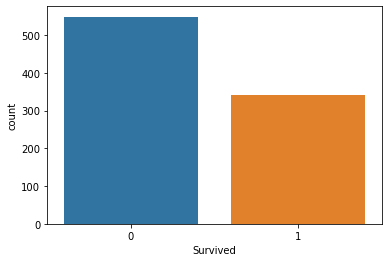

In [49]:
sns.countplot(Y)

In [50]:
#Balencing the data

from imblearn.over_sampling import SMOTE
smote= SMOTE()

In [51]:
X_smote, Y_smote= smote.fit_resample(X,Y)

In [52]:
from collections import Counter
print('Actual classes', Counter(Y))
print('Smote classes',Counter(Y_smote))

Actual classes Counter({0: 549, 1: 342})
Smote classes Counter({0: 549, 1: 549})


<AxesSubplot:xlabel='Survived', ylabel='count'>

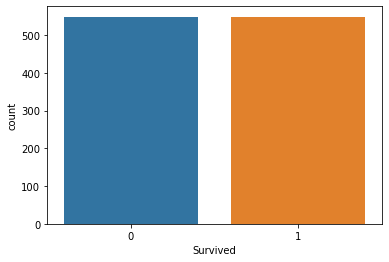

In [53]:
sns.countplot(Y_smote)

### Now we have balenced data so lets train and test the model

In [54]:
# Creating training and testing model
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X_smote, Y_smote, random_state=3)

In [55]:
from sklearn.svm import SVC
svclassifier= SVC()
svclassifier.fit(X_train, Y_train)

SVC()

In [56]:
Y_hat= svclassifier.predict(X_test)
Y_hat

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [57]:
# Evaluating the model created

from sklearn.metrics import accuracy_score, classification_report, f1_score
acc= accuracy_score(Y_test, Y_hat)
acc

0.7636363636363637

In [58]:
print(classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       149
           1       0.76      0.71      0.73       126

    accuracy                           0.76       275
   macro avg       0.76      0.76      0.76       275
weighted avg       0.76      0.76      0.76       275



In [59]:
f1= f1_score(Y_test,Y_hat)
f1

0.7325102880658436

In [60]:
sclassifier= SVC(kernel="linear")
sclassifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [61]:
Y_pred= sclassifier.predict(X_test)

In [62]:
f1_score(Y_test,Y_pred)

0.7391304347826088

In [63]:
sclassifier= SVC(kernel="poly")
sclassifier.fit(X_train, Y_train)

SVC(kernel='poly')

In [64]:
Y_p= sclassifier.predict(X_test)
f1_score(Y_test,Y_p)

0.7736625514403291

In [65]:
from sklearn.model_selection import cross_val_score

scores= cross_val_score(svclassifier,X,Y, cv=2, scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean()) 
print("Std :",scores.std())

[0.69565217 0.68327402]
Cross validation Score: 0.6894630976326783
Std : 0.006189076280365136


In [66]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
             
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3,scoring='f1',cv=3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ....................C=0.1, gamma=1;, score=0.744 total time=   0.0s
[CV 2/3] END ....................C=0.1, gamma=1;, score=0.752 total time=   0.0s
[CV 3/3] END ....................C=0.1, gamma=1;, score=0.746 total time=   0.0s
[CV 1/3] END ..................C=0.1, gamma=0.1;, score=0.744 total time=   0.0s
[CV 2/3] END ..................C=0.1, gamma=0.1;, score=0.736 total time=   0.0s
[CV 3/3] END ..................C=0.1, gamma=0.1;, score=0.736 total time=   0.0s
[CV 1/3] END .................C=0.1, gamma=0.01;, score=0.678 total time=   0.0s
[CV 2/3] END .................C=0.1, gamma=0.01;, score=0.680 total time=   0.0s
[CV 3/3] END .................C=0.1, gamma=0.01;, score=0.680 total time=   0.0s
[CV 1/3] END ................C=0.1, gamma=0.001;, score=0.678 total time=   0.0s
[CV 2/3] END ................C=0.1, gamma=0.001;, score=0.680 total time=   0.0s
[CV 3/3] END ................C=0.1, gamma=0.001;

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [67]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1}
SVC(C=100, gamma=1, random_state=42)


In [68]:
clf=SVC(C=100, gamma=1,random_state=42)

In [69]:
clf.fit(X_train, Y_train)

SVC(C=100, gamma=1, random_state=42)

In [70]:
Y_clf=clf.predict(X_test)

In [71]:
print(classification_report(Y_test,Y_clf))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       149
           1       0.76      0.76      0.76       126

    accuracy                           0.78       275
   macro avg       0.78      0.78      0.78       275
weighted avg       0.78      0.78      0.78       275



In [72]:
f1=f1_score(Y_test,Y_clf)
f1

0.7619047619047619

In [73]:
scores_after = cross_val_score(clf,X,Y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())

[0.71568627 0.76233184 0.6984127 ]
Cross validation Score: 0.7254769371625084
Std : 0.006189076280365136
